# An attempt at automated lifetime calculations

In [1]:
# Importing necessary libraries
import numpy as np
from scipy.signal import argrelextrema
import pandas as pd

In [2]:
def lifetime_calculator(fname):
    # reads file containing grep for a certain state and symmetry
    df = pd.read_csv(fname)
    # making a dictionary to contain the states file
    states_vals = dict(df.values)
    # taking the energy values
    evals = np.array(list(states_vals.values()))
    # counting the no of local minima
    locmin = len(evals[argrelextrema(evals, np.less)[0]])
    # counting the no of local maxima
    locmax = len(evals[argrelextrema(evals, np.greater)[0]])
    # if the number of local minima = local maxima then calculations can proceed
    if locmin==locmax:
        print("Continue")
        E2= evals[argrelextrema(evals, np.greater)[0]]
        E1= evals[argrelextrema(evals, np.less)[0]]
        newdf = pd.DataFrame({'E1' : E1})
        keyval_E1= []
        for i in E1:
            E1key = list(states_vals.keys())[list(states_vals.values()).index(i)]
            keyval_E1.append(E1key)
        keyval_E2= []
        for i in E2:
            E2key = list(states_vals.keys())[list(states_vals.values()).index(i)]
            keyval_E2.append(E2key)
        newdf['E2']=pd.Series(E2)
        newdf['R1']=pd.Series(keyval_E1)
        newdf['R2']=pd.Series(keyval_E2)
        newdf['lifetimes'] = 0.000000000005308838/(0.5*(newdf['E2']-newdf['E1']))
        print("############INITIAL DATAFRAME############")
        print(newdf)
        print("Lifetime Average:",newdf['lifetimes'].mean(),"s")
        print("Lifetime standard deviation",newdf['lifetimes'].std(),"s")
        if (newdf[newdf["lifetimes"]>=1e-11].empty) & (newdf[newdf["lifetimes"]<=1e-13].empty): 
            print("Lifetimes are within picosecond range")
        else:
            dropdf = newdf[(newdf["lifetimes"] < 1e-11) & (newdf["lifetimes"] > 1e-13)]
            print("############AFTER DROPPING############")
            print(dropdf)
            print("Lifetime Average:",dropdf['lifetimes'].mean(),"s")
            print("Lifetime standard deviation",dropdf['lifetimes'].std(),"s")
    # if they are not equal, this implies number of local minima/local maxima detected incorrectly, 
    # so the differences in energies and hence the lifetimes need to be calculated manually.
    else:
        print("Do calculations manually")
        print(f"Detected number of local minima:{locmin}")
        print(f"Detected number of local maxima:{locmax}")

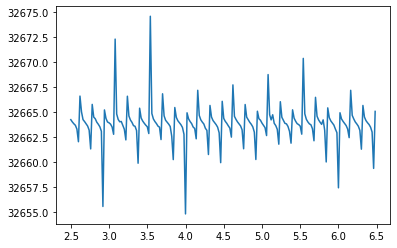

In [5]:
#Example where locmin != locmax, there are incorrectly detected local minima/maxima
import matplotlib.pyplot as plt
df1 = pd.read_csv('grep_st_95ma.csv')
plt.plot(df1['r'], df1['e'])

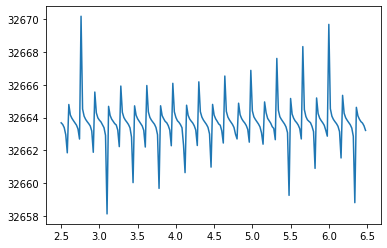

In [6]:
#Example where locmin = locmax
df2 = pd.read_csv('grep_st_shift08.csv')
plt.plot(df2['r'], df2['e'])

In [2]:
lifetime_calculator(fname = 'grep_st_95ma.csv')

Do calculations manually
Detected number of local minima:29
Detected number of local maxima:28


In [3]:
lifetime_calculator(fname = 'grep_st_shift08.csv')

Continue
############INITIAL DATAFRAME############
             E1           E2    R1    R2     lifetimes
0   32661.85902  32664.79785  2.58  2.60  3.612892e-12
1   32662.69759  32670.16527  2.74  2.76  1.421817e-12
2   32661.89131  32665.55511  2.92  2.94  2.897996e-12
3   32658.14304  32664.68489  3.10  3.12  1.623039e-12
4   32662.23505  32665.91979  3.26  3.28  2.881527e-12
5   32660.04599  32664.71576  3.44  3.46  2.273704e-12
6   32662.21060  32665.95253  3.60  3.62  2.837487e-12
7   32659.69535  32664.71949  3.78  3.80  2.113332e-12
8   32662.28836  32666.08667  3.94  3.96  2.795368e-12
9   32660.65371  32664.75396  4.12  4.14  2.589519e-12
10  32662.30385  32666.17565  4.28  4.30  2.742310e-12
11  32660.98876  32664.80305  4.46  4.48  2.783657e-12
12  32662.45444  32666.52899  4.62  4.64  2.605852e-12
13  32662.70308  32664.87663  4.80  4.82  4.884947e-12
14  32662.50741  32666.87282  4.96  4.98  2.432229e-12
15  32662.38367  32664.95418  5.14  5.16  4.130572e-12
16  32662.6567

In [4]:
lifetime_calculator(fname = 'grep_st_ser.csv')

Do calculations manually
Detected number of local minima:29
Detected number of local maxima:28


In [5]:
lifetime_calculator(fname = 'grep_st_shift01.csv')

Continue
############INITIAL DATAFRAME############
             E1           E2    R1    R2     lifetimes
0   32658.86771  32664.79213  2.56  2.58  1.792188e-12
1   32662.35483  32666.84686  2.72  2.74  2.363670e-12
2   32656.59819  32664.91162  2.90  2.92  1.277172e-12
3   32662.23820  32666.22779  3.06  3.08  2.661345e-12
4   32657.30468  32664.68334  3.24  3.26  1.438971e-12
5   32660.84413  32665.06988  3.40  3.42  2.512613e-12
6   32662.46193  32667.27293  3.56  3.58  2.206958e-12
7   32660.06980  32664.72992  3.74  3.76  2.278413e-12
8   32661.94194  32665.63958  3.90  3.92  2.871474e-12
9   32662.62164  32668.14475  4.06  4.08  1.922409e-12
10  32659.22323  32664.90999  4.24  4.26  1.867087e-12
11  32662.24193  32666.21061  4.40  4.42  2.675367e-12
12  32659.23185  32664.68359  4.58  4.60  1.947576e-12
13  32660.93451  32665.23771  4.74  4.76  2.467391e-12
14  32662.24866  32667.46050  4.90  4.92  2.037222e-12
15  32661.03817  32664.87069  5.08  5.10  2.770416e-12
16  32661.7808